# <center> POSTGRADUATE CERTIFICATE PROGRAM IN DATA SCIENCE AND MACHINE LEARNING (PGCP-DSML)</center>

## <center> Hackathon 2  </center>

## <center> Classification Models  </center>

## <center> Submitted by Mighty Condas </center>

In [1]:
input_file= "Data_Preprocess_Train.csv"
test_file  = "Data_Preprocess_Test.csv"

In [2]:
master_models_list = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'GaussianNB', \
               'DecisionTreeClassifier', 'BaggingClassifier', 'RandomForestClassifier',\
               'GradientBoostingClassifier', 'AdaBoostClassifier','XGBClassifier']

In [3]:
# models to be trained. list of models from above can be entered for automatic generation of models

models_list = master_models_list
models_list.remove('XGBClassifier')
models_list

['LogisticRegression',
 'SVC',
 'KNeighborsClassifier',
 'GaussianNB',
 'DecisionTreeClassifier',
 'BaggingClassifier',
 'RandomForestClassifier',
 'GradientBoostingClassifier',
 'AdaBoostClassifier']

In [4]:
# set to true if best parameters need to be calculated using gridsearch
get_params = True

In [5]:
# import necessary libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
sns.set(font_scale = 1.3)
%matplotlib inline
plt.rcParams.update({'font.size': 15})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [7]:
# get current time for creating folder for saving predictions

from datetime import datetime

now = datetime.now() # current date and time
dt = now.strftime("%m/%d/%Y, %H:%M:%S")
dt = dt.replace(',',"")
dt = dt.replace('/',"-")
dt = dt.replace(':',"-")
print("current time:-", dt)



current time:- 04-05-2022 09-50-18


In [8]:
# create folder name with timestamp to store metrics and target data
folder_name = 'Predictions/' + dt +'/'
display(folder_name)

# create folder
import os
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

'Predictions/04-05-2022 09-50-18/'

Steps followed:


-   For each model:
1.   Build the model and fit the data
2.   Plot the function 
3.   Calculate MSE and R2 score of the fitting

In [9]:
# Xdata and ydata are training data
# Using grid search to get the best parameters for the model

def get_best_params(model, param_range, Xdata, ydata):
    
    cv_param = GridSearchCV(estimator=model, param_grid= param_range,
                          cv=10, return_train_score=True).fit(Xdata, ydata)
    display()
    return(cv_param.best_params_)

In [10]:
# this function calculates tp, tn, fp and fn for binary and multiclass data

def calc_from_conf_matrix(actual, predicted):
    


    cm = confusion_matrix(actual, predicted)
    
    tp_lst = []
    tn_lst = []
    fp_lst = []
    fn_lst = []

    sum_diagonal = np.trace(cm)

    for i in range(cm.shape[0]):
    
#        for j in range(cm.shape[1]):
            
#            if (i == j):
#                tp_lst.append(cm[i,j])

        tp_lst.append(cm[i,i])    
        tn_lst.append(sum_diagonal - cm[i][i])
        fp_lst.append(np.sum(cm[:,i], axis=0) - cm[i][i])
        fn_lst.append(np.sum(cm[i,:]) - cm[i][i])
            
        return (np.mean(tn_lst),
               np.mean(fp_lst),
               np.mean(fn_lst),
               np.sum(tp_lst))
    
    
  

In [11]:
# function to get model metrics

def get_model_metrics(actual, predicted, classifier_name):
    
    acc            = accuracy_score(actual, predicted)
    f1             = np.mean(f1_score(actual, predicted, average=None))
    
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
#    tn, fp, fn, tp = calc_from_conf_matrix(actual, predicted)
    sensitivity    = tp / (tp + fn)
    specificity    = tn / (tn + fp)
    fpr, tpr, thresholds = roc_curve(actual, predicted, pos_label=1)
    auc_value      = auc(fpr, tpr)
    
    display(acc)
    return {'Classifier_Name': classifier_name,
            'Accuracy'       : acc,
            'F1_Score'       : f1,
            'Sensitivity'    : sensitivity,
            'Specificity'    : specificity,
            'AUC'            : auc_value,
            'FPR_Values'     : fpr,
            'TPR_Values'     : tpr}

In [12]:
# function that gets does prediction and plots results

def perform_classification_function(model_name, model_instance, parameters, Xtrain, Xtest, ytrain, ytest):
    
    # predict y using the model instance
    ypred   = model_instance.predict(Xtest)
    
    print("Classification Report")
    print("=====================")
    print(classification_report(ytest, ypred))
    
    print("Confusion Matrix")
    print("================")
    print(confusion_matrix(ytest, ypred))
    
# display the heatmap and decision boundaries map side-by-side
#    sns.heatmap(confusion_matrix(ytest, ypred), annot=True, cmap='crest',  linewidths=0.5, ax=axes1,fmt='d')
    
#    display_decision_boundaries(model_name, model_instance, parameters, Xtest, ytest, axes2)
    
    model_metrics = get_model_metrics(ytest, ypred, model_name)
    
    
    return model_metrics

In [13]:
# create dataframe with model metrics for displaying the results

column_names = ["Classifier_Name", "Param_List","Accuracy", 'F1_Score', "Sensitivity", "Specificity",\
                "AUC", "FPR_Values", "TPR_Values"]
metrics_df   = pd.DataFrame(columns=column_names)
metrics_df

,Classifier_Name,Param_List,Accuracy,F1_Score,Sensitivity,Specificity,AUC,FPR_Values,TPR_Values


---

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
# reading the unscaled data which was output from EDA

data = pd.read_csv(input_file )

data.head()

,customer_id,temperature,time,expiration,age,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,dest_Home,dest_No Urgent Place,dest_Work,pass_Alone,pass_Friend(s),pass_Kid(s),pass_Partner,weather_Rainy,weather_Snowy,weather_Sunny,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),gender_Female,gender_Male,mar_Divorced,mar_Married partner,mar_Single,mar_Unmarried partner,mar_Widowed
0,258868,80,4,1,1,0,3,0,1,2,3,4,4,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1,318369,80,1,2,1,0,5,0,4,2,3,4,3,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2,320906,80,2,2,1,0,3,0,1,2,5,4,3,3,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,412393,55,1,2,1,0,5,2,3,2,2,4,3,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
4,290854,30,4,1,1,0,3,1,2,3,2,4,2,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [16]:
X_scaled = data.drop(['customer_id','Y'], axis=1)
y = data['Y']

In [17]:

X_scaled.shape

(10147, 39)

In [18]:
from collections import Counter
Counter(y)

Counter({1: 5768, 0: 4379})

In [19]:
y = np.array(y).reshape(-1,1)


##### ii) Apply standard scaler function to normalize the data as per normal distribution.

In [20]:
#from sklearn.preprocessing import StandardScaler

#ss = StandardScaler()
#X_scaled = ss.fit_transform(X)
#X_scaled.shape, 
y.shape


(10147, 1)

##### iii) Split the dataset into 85% training and 15% testing patterns.

In [21]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.15, random_state=42,
                                               stratify=y)

In [22]:
from sklearn.metrics import accuracy_score, f1_score

#### Modeling all Base Classifiers to find which model works best

In [23]:
# create parameters list with requried parameters for the models chosen
# order of parameters must be same as models list

RANDOM_STATE = 42
model_instance_list = []

if 'LogisticRegression' in models_list:
    model_instance_list.append(LogisticRegression(random_state=RANDOM_STATE))
if 'SVC' in models_list:
    model_instance_list.append(SVC(random_state=RANDOM_STATE))
if 'KNeighborsClassifier' in models_list:
    model_instance_list.append(KNeighborsClassifier())

#------------

if 'GaussianNB' in models_list:
    model_instance_list.append(GaussianNB())
if 'DecisionTreeClassifier' in models_list:
    model_instance_list.append(DecisionTreeClassifier(random_state=RANDOM_STATE))
if 'BaggingClassifier' in models_list:
    model_instance_list.append(BaggingClassifier(random_state=RANDOM_STATE))

if 'RandomForestClassifier' in models_list:
    model_instance_list.append(RandomForestClassifier(random_state=RANDOM_STATE))
if 'GradientBoostingClassifier' in models_list:
    model_instance_list.append(GradientBoostingClassifier(random_state=RANDOM_STATE))
if 'AdaBoostClassifier' in models_list:
    model_instance_list.append(AdaBoostClassifier(random_state=RANDOM_STATE))    
if 'XGBClassifier' in models_list:
    model_instance_list.append(XGBClassifier(random_state=RANDOM_STATE))     
    
model_instance_list


[LogisticRegression(random_state=42),
 SVC(random_state=42),
 KNeighborsClassifier(),
 GaussianNB(),
 DecisionTreeClassifier(random_state=42),
 BaggingClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42),
 AdaBoostClassifier(random_state=42)]

In [24]:
# determine number of rows and columns for subplots based on the number of models

count  = 1
n_cols = 2
if len(models_list) > 2:
    n_cols = 3               # set max columns in a row to be 3
    

n_rows = (len(models_list) / n_cols) + 1

In [25]:
metrics_df = metrics_df.iloc[0:0]


count = 1
inst_list = []

for i, model_name in enumerate(models_list):
    
# Python locals() function returns the dictionary of the current local symbol table.    
# ** is dictionary unpacking.


    instance = model_instance_list[i].fit(Xtrain, ytrain)
    display(instance)
    
#    parameters = [ str(key)+ " : " + str(values)  for key, values in parameters_list[i].items()]
#    parameters = " " if not parameters else str(parameters)
    parameters = ''
    
    model_metrics = perform_classification_function(model_name, instance, str(parameters), Xtrain, Xtest, ytrain, ytest )

    inst_list.append(instance)

    metrics_df = metrics_df.append(model_metrics, ignore_index=True)
    metrics_df.loc[(metrics_df.Classifier_Name == model_name),['Param_List']] = parameters
    
    
   
    print("=====================================================================================================")


LogisticRegression(random_state=42)

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       657
           1       0.71      0.77      0.74       866

    accuracy                           0.70      1523
   macro avg       0.69      0.68      0.68      1523
weighted avg       0.69      0.70      0.69      1523

Confusion Matrix
[[388 269]
 [195 671]]


0.6953381483913329

SVC(random_state=42)

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       657
           1       0.57      1.00      0.72       866

    accuracy                           0.57      1523
   macro avg       0.28      0.50      0.36      1523
weighted avg       0.32      0.57      0.41      1523

Confusion Matrix
[[  0 657]
 [  0 866]]


0.5686145764937623

KNeighborsClassifier()

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.54      0.56       657
           1       0.67      0.72      0.70       866

    accuracy                           0.64      1523
   macro avg       0.63      0.63      0.63      1523
weighted avg       0.64      0.64      0.64      1523

Confusion Matrix
[[352 305]
 [241 625]]


0.6414970453053185

GaussianNB()

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.61      0.63       657
           1       0.71      0.74      0.73       866

    accuracy                           0.69      1523
   macro avg       0.68      0.68      0.68      1523
weighted avg       0.68      0.69      0.68      1523

Confusion Matrix
[[400 257]
 [222 644]]


0.685489166119501

DecisionTreeClassifier(random_state=42)

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       657
           1       0.72      0.70      0.71       866

    accuracy                           0.67      1523
   macro avg       0.67      0.67      0.67      1523
weighted avg       0.67      0.67      0.67      1523

Confusion Matrix
[[420 237]
 [261 605]]


0.6730137885751806

BaggingClassifier(random_state=42)

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       657
           1       0.78      0.73      0.75       866

    accuracy                           0.72      1523
   macro avg       0.72      0.72      0.72      1523
weighted avg       0.73      0.72      0.73      1523

Confusion Matrix
[[475 182]
 [237 629]]


0.7248850952068286

RandomForestClassifier(random_state=42)

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       657
           1       0.77      0.83      0.80       866

    accuracy                           0.76      1523
   macro avg       0.76      0.75      0.75      1523
weighted avg       0.76      0.76      0.76      1523

Confusion Matrix
[[438 219]
 [143 723]]


0.7623112278397899

GradientBoostingClassifier(random_state=42)

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       657
           1       0.75      0.83      0.78       866

    accuracy                           0.74      1523
   macro avg       0.74      0.73      0.73      1523
weighted avg       0.74      0.74      0.74      1523

Confusion Matrix
[[414 243]
 [151 715]]


0.7413000656598818

AdaBoostClassifier(random_state=42)

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       657
           1       0.71      0.78      0.74       866

    accuracy                           0.69      1523
   macro avg       0.69      0.68      0.68      1523
weighted avg       0.69      0.69      0.69      1523

Confusion Matrix
[[381 276]
 [190 676]]


0.6940249507550886

In [26]:
metrics_df.drop(['FPR_Values','TPR_Values'], axis=1).sort_values(by='F1_Score', ascending=False)


,Classifier_Name,Param_List,Accuracy,F1_Score,Sensitivity,Specificity,AUC
6,RandomForestClassifier,,0.762311,0.753686,0.834873,0.666667,0.750770
7,GradientBoostingClassifier,,0.741300,0.730784,0.825635,0.630137,0.727886
5,BaggingClassifier,,0.724885,0.722043,0.726328,0.722983,0.724656
0,LogisticRegression,,0.695338,0.684443,0.774827,0.590563,0.682695
8,AdaBoostClassifier,,0.694025,0.682098,0.780600,0.579909,0.680255
3,GaussianNB,,0.685489,0.677204,0.743649,0.608828,0.676238
4,DecisionTreeClassifier,,0.673014,0.668117,0.698614,0.639269,0.668942
2,KNeighborsClassifier,,0.641497,0.629596,0.721709,0.535769,0.628739
1,SVC,,0.568615,0.362495,1.000000,0.000000,0.500000


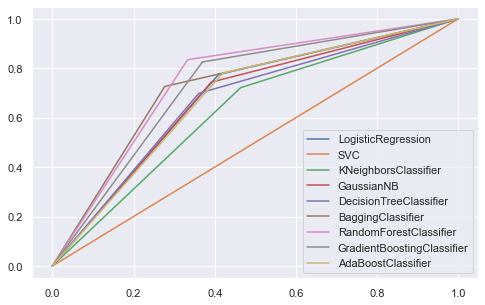

In [27]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1)
for row, data in metrics_df.iterrows():
    
    plt.plot(np.array(data.FPR_Values), np.array(data.TPR_Values), label=data.Classifier_Name)

plt.savefig(folder_name + "AUC_Comparisons.jpeg")


plt.legend();

In [29]:
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
rf_model.fit(Xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [36]:
ypred = rf_model.predict(Xtest)
ypred

array([1, 0, 0, ..., 1, 0, 0])

In [37]:
ytest

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [43]:
ytest.shape

(1523, 1)

In [44]:
ypred.shape

(1523,)

In [47]:
data_test = pd.read_csv(test_file)
data_test.drop("customer_id", axis=1, inplace=True)
data_test.head()

,temperature,time,expiration,age,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,dest_Home,dest_No Urgent Place,dest_Work,pass_Alone,pass_Friend(s),pass_Kid(s),pass_Partner,weather_Rainy,weather_Snowy,weather_Sunny,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),gender_Female,gender_Male,mar_Divorced,mar_Married partner,mar_Single,mar_Unmarried partner,mar_Widowed
0,80,4,1,0,0,3,2,1,1,3,2,4,2,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,80,4,2,1,0,2,2,2,3,1,5,4,3,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,55,2,1,1,1,3,1,3,1,1,3,2,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,80,4,1,3,1,4,3,5,1,4,4,3,2,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,30,1,1,1,0,3,2,7,1,1,3,4,2,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [48]:
ypred = rf_model.predict(data_test)

In [49]:
ypred

array([1, 1, 1, ..., 0, 0, 1])

In [54]:
data_test_df=pd.read_csv(test_file)
data_test_df.head()

,customer_id,temperature,time,expiration,age,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,dest_Home,dest_No Urgent Place,dest_Work,pass_Alone,pass_Friend(s),pass_Kid(s),pass_Partner,weather_Rainy,weather_Snowy,weather_Sunny,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),gender_Female,gender_Male,mar_Divorced,mar_Married partner,mar_Single,mar_Unmarried partner,mar_Widowed
0,374679,80,4,1,0,0,3,2,1,1,3,2,4,2,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,469678,80,4,2,1,0,2,2,2,3,1,5,4,3,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,216140,55,2,1,1,1,3,1,3,1,1,3,2,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,184301,80,4,1,3,1,4,3,5,1,4,4,3,2,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,148720,30,1,1,1,0,3,2,7,1,1,3,4,2,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [56]:
submission_df=pd.DataFrame({
    "customer_id": data_test_df['customer_id'],
    "Y": ypred
})

In [58]:
submission_df.head()

,customer_id,Y
0,374679,1
1,469678,1
2,216140,1
3,184301,0
4,148720,1


In [60]:
submission_df.shape, data_test_df.shape

((2537, 2), (2537, 40))

In [64]:
submission_df.to_csv('submission_rfc_no_parameter.csv', index=False)